<a href="https://colab.research.google.com/github/DishaArsude/Tamizan-Skills-Internship-ML-AI-PROJECT-4/blob/main/Project_4_Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
data = {
    "text": [
        "The economy is doing well, says finance minister.",
        "Aliens landed in Europe last night.",
        "Government launches new health scheme for rural areas.",
        "Celebrity claims to be 300 years old.",
        "Education budget increased by 15% this year.",
        "Scientists discover a portal to another dimension.",
        "New trains to be introduced in southern states.",
        "Social media causes brain damage, claims unknown study."
    ],
    "label": [1, 0, 1, 0, 1, 0, 1, 0]  # 1 = Real, 0 = Fake
}
df = pd.DataFrame(data)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.25, random_state=42)


In [ ]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
pac = PassiveAggressiveClassifier(max_iter=1000)
pac.fit(X_train_tfidf, y_train)
pac_preds = pac.predict(X_test_tfidf)


In [ ]:
svm_model = svm.SVC(kernel='linear', probability=True)
svm_model.fit(X_train_tfidf, y_train)
svm_preds = svm_model.predict(X_test_tfidf)


In [ ]:
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"🔍 {name} Accuracy: {acc:.2f}")
    print(f"🔍 {name} F1 Score: {f1:.2f}")
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"{name} - Confusion Matrix")
    plt.show()


🔍 Passive Aggressive Accuracy: 0.00
🔍 Passive Aggressive F1 Score: 0.00


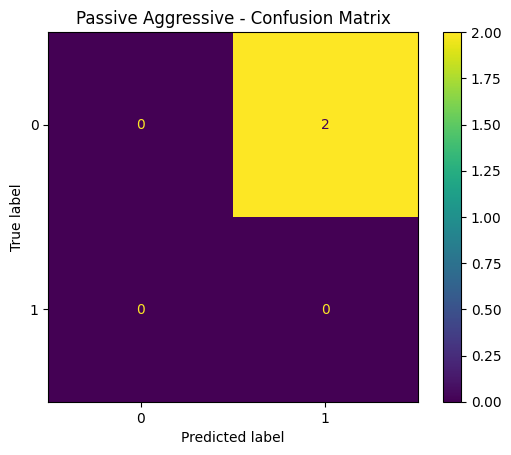

🔍 SVM Accuracy: 0.00
🔍 SVM F1 Score: 0.00


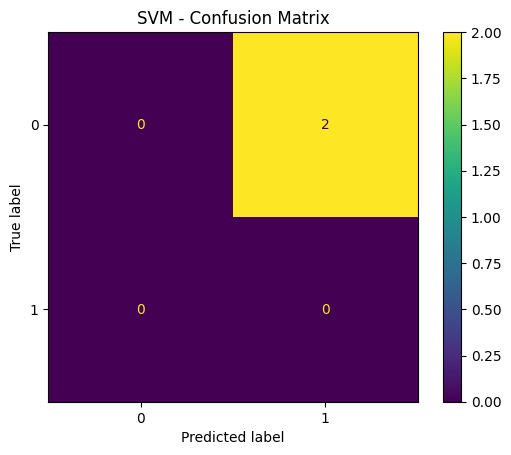

In [ ]:
evaluate_model("Passive Aggressive", y_test, pac_preds)
evaluate_model("SVM", y_test, svm_preds)


In [ ]:
sample_text = ["Aliens attack Earth, government hides it."]
sample_vec = tfidf.transform(sample_text)
sample_pred = pac.predict(sample_vec)
print("Prediction for sample news:", "REAL" if sample_pred[0] == 1 else "FAKE")

Prediction for sample news: REAL
